# selecting features prossec:



In [23]:
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt



df=pd.read_csv('dataR2.csv')
x=df.iloc[:,0:9]
y=df.iloc[:,-1]
y=y-1

# plotting univarient featuer diagram:

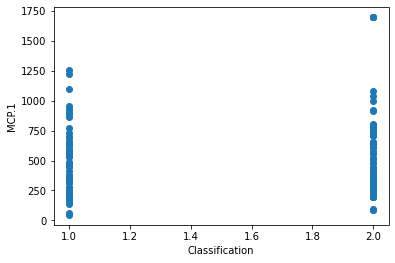

In [24]:

st='MCP.1'#با تغییر این پارمتر می توان نمودار دلخواه را رسم کرد که به صورت  یک رشته است که باید نام فیچر مورد نظر را در اینجا قرار داد

plt.scatter(df['Classification'],df[st])
plt.xlabel('Classification')
plt.ylabel(st)
plt.show()

# plotting two featuer diagram:

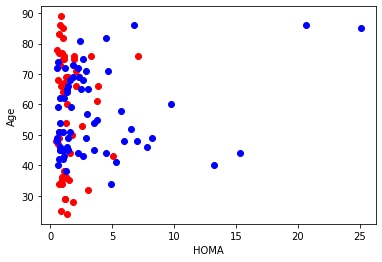

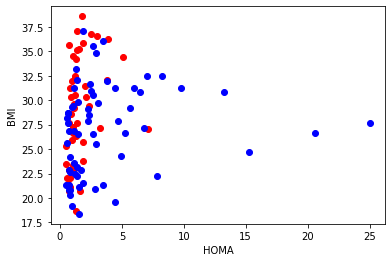

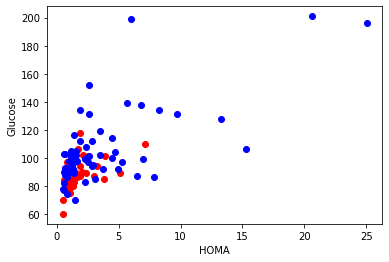

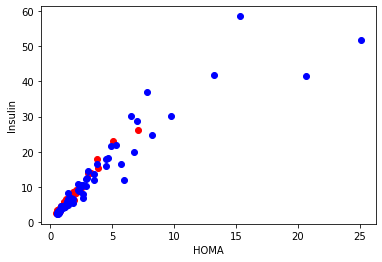

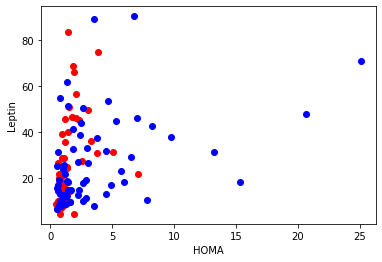

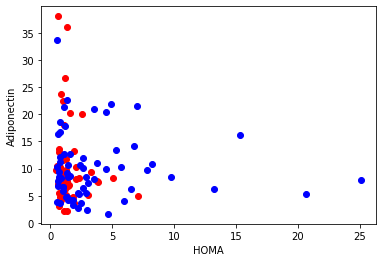

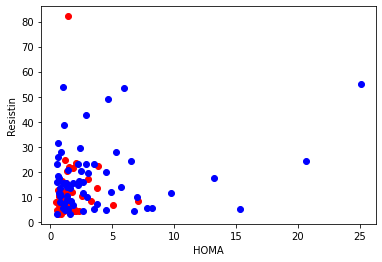

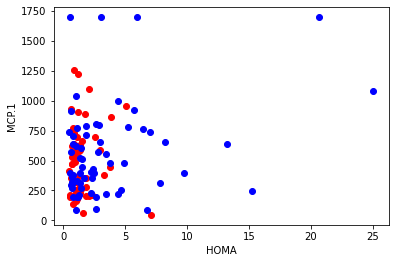

In [25]:
process_data=df.drop(['Classification'],axis=1)
y_label=process_data.columns


st='HOMA'#با تغییر این پارمتر می توان نمودار دلخواه را رسم کرد که به صورت  یک رشته است که باید نام فیچر مورد نظر را در اینجا قرار داد 
#که فیچر انتخاب شده را بر حسب سایر فیچر ها رسم می کند


x_label=[st]
y_label=process_data.columns


for l in x_label:
    for k in y_label:
        for c in range(2):
            if l!=k:
                x_ = process_data[df['Classification'] == (c + 1)][l]
                y_ = process_data[df['Classification'] == (c + 1)][k]
                plt.plot(x_, y_, 'trb'[(c + 1)] + 'o')
                plt.xlabel(l)
                plt.ylabel(k)


        plt.show()

# useing from sklearn.feature_selection import SelectKBest, chi2 for selecting best featur
این قطعه کد با استفاده از کلاس بالا فیچر ها را ارزیابی می کند

In [28]:
from sklearn.feature_selection import SelectKBest, chi2
bestfeature=SelectKBest(score_func=chi2,k=6)
fit=bestfeature.fit(x,y)

In [29]:
dfscore=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)

In [30]:
featureScores=pd.concat([dfcolumns,dfscore],axis=1)
featureScores.columns=['specs','score']

In [31]:
featureScores

,specs,score
0,Age,0.988417
1,BMI,1.847119
2,Glucose,88.125373
3,Insulin,89.203820
4,HOMA,45.656784
5,Leptin,0.001849
6,Adiponectin,0.200949
7,Resistin,61.949833
8,MCP.1,214.917039


# useing from sklearn.ensemble import ExtraTreesClassifier for validating features
حال با استفاده از این کلاس اهمیت فیچر ها را تعیین می کنیم

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt


model=ExtraTreesClassifier()
model.fit(x,y)


ExtraTreesClassifier()

In [34]:
print(model.feature_importances_)

[0.15482786 0.11133953 0.18089134 0.09267207 0.09242679 0.08224011
 0.0759044  0.14151073 0.06818717]


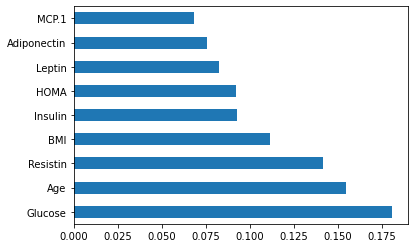

In [35]:
feat_importances=pd.Series(model.feature_importances_, index = x.columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

# useing heatmap for validating features with import seaborn as sns

حال کرلیشن میان داده ها را با این کلاس می یابیم

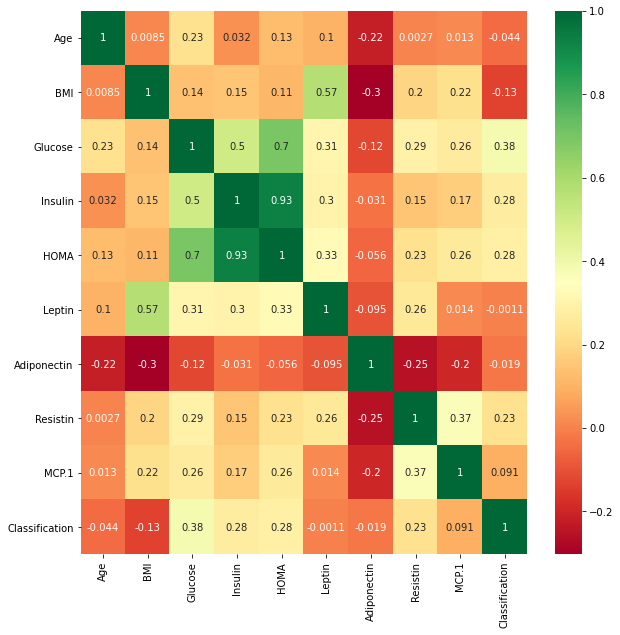

In [36]:
import seaborn as sns
cormat=df.corr()
top_corr_features=cormat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

# calcucating mean and variance of features for validating featuers 

In [37]:


df_1=df.drop(['Classification'],axis=1)
process_data=pd.DataFrame()
t=df_1.mean()
r=df_1.std()
df_1=(df_1-t)/r

print('mean:')
print(df.mean())
print('#########################')
print('variadnce:')
print(df.var())

mean:
Age                57.301724
BMI                27.582111
Glucose            97.793103
Insulin            10.012086
HOMA                2.694988
Leptin             26.615080
Adiponectin        10.180874
Resistin           14.725966
MCP.1             534.647000
Classification      1.551724
dtype: float64
#########################
variadnce:
Age                  259.621214
BMI                   25.201763
Glucose              507.382909
Insulin              101.359945
HOMA                  13.264479
Leptin               367.998771
Adiponectin           46.831322
Resistin             153.528100
MCP.1             119655.570601
Classification         0.249475
dtype: float64
